# Marinvaders - example tutorial


<a href="https://mybinder.org/v2/gl/marinvaders%2Fmarinvaders/master?filepath=%2Fdocs%2Fmarinvaders_tutorial.ipynb">
<img style="float: left" width="100" height="100"  src="https://mybinder.org/badge_logo.svg">
&nbsp;
try the notebook online
</a> 
<br>
<a href="https://gitlab.com/dlab-indecol/marinvaders/-/blob/master/LICENSE/">
<img style="float: left" width="100" height="100"  src="https://img.shields.io/badge/License-GPLv3-blue.svg">
&nbsp; 
software license
</a> 


## Introduction

The Marine Invaders toolkit (Marinvaders) cross-references several marine 
databases to gather information on the native and alien distribution of 
marine species.

Marinvaders allows to assess the alien and native status of a specific 
species accross [eco-regions](https://en.wikipedia.org/wiki/Marine_ecoregions) and to list all alien and native species within a 
specific eco-region.

This is done by quering the [OBIS](https://obis.org/) data for distributions 
of species and linking this data to the native/alien assessment in the 
[WoRMS](http://www.marinespecies.org/index.php), 
[NatCon](https://www.conservationgateway.org/ConservationPractices/Marine/Pages/marineinvasives.aspx) and 
[GISD](http://www.iucngisd.org/gisd/) (optional) 
data bases. Marinvaders aims to facilitate the development of large-scale 
impact assessments of marine invasive species.

The Open Source code [GNU GPL 
v3](https://www.gnu.org/licenses/gpl-3.0.en.html) of marinvaders [can be found on 
Gitlab](https://gitlab.com/dlab-indecol/marinvaders), where you can also read more about the data sources and data handling. Note that the data included and processed by marinvaders keep it original license - see the [README.md License section](https://gitlab.com/marinvaders/marinvaders#license-and-data-terms-of-use) for furter information.

The following tutorial consists of two parts. In

- [Species analysis](#Species-analysis) , we investigate the native and invasive distribution of a certain species. In
- [Eco-region assessment](#Eco-region-assessment), we explore native and 

alien species within a specific eco-region

For both sections, we need the marinvaders library. See the 
[README](https://gitlab.com/dlab-indecol/marinvaders/-/blob/master/README.md) at the 
repository for the full installation instructions.

In [1]:
import marinvaders

For convenience, we are using [itable](https://github.com/mwouts/itables) heres to show interactive pandas DataFrames.
This does only work in the classic Jupyter Notebook view (not in in 
JupyterLab). If you are running the latter, switch to the classic view in 
"Help - Launch Classic Notebook" or remove the next cell (itables adds interactive filtering and search to the pandas.DataFrames - the notebook can also used without that).

In [2]:
import itables.options as opt

opt.classes = ["display", "nowrap"]
opt.columnDefs = [{"width": "120px", "targets": "_all"}]
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# If you receive a read "Javascript Error" here, see explanation above.

<IPython.core.display.Javascript object>

With all the setup out of the way, we can start with the first analysis.

## Species analysis

<img style="float: right" alt="a striped barnacle" src="http://images.marinespecies.org/thumbs/12795_paarsgestreepte-zeepok.jpg?w=200"> 

Here we analyse the native and invasive distribution of a certain species.
As an example we use *Amphibalanus amphitrite* (Darwin, 1854), aka the
[striped barnacle](https://en.wikipedia.org/wiki/Amphibalanus_amphitrite). 

Since species names can change as part of taxonomic restructuring, 
marinvaders uses the AphiaID to specify a certain species. We can obtain 
this id from the [World Register of Marine Species, 
WORMS](https://www.marinespecies.org):

In the search field there, enter the species 
name and you get forwarded to the [WORMS register of this 
barnacle.](https://www.marinespecies.org/aphia.php?p=taxdetails&id=421137).  
The AphiaID is stated as first entry in the overview (which is the same as 
the id used in the url). You can either use the integer number or the full 
universal identifiers string ('urn:lsid:marinespecies.org:taxname:421137'). 


Thus (this command might take some time as it collects information from 
various web data-sources):


In [3]:
species_data = marinvaders.Species(aphia_id=107379)

We can now investigate all recorded observations of this this species:

In [4]:
species_data.all_occurrences

aphiaID              species       scientificName    acceptedNameUsage  \
0    107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   
1    107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   
2    107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   
3    107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   
4    107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   
..      ...                  ...                  ...                  ...   
79   107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   
80   107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   
81   107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   
82   107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   
83   107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   

                     ECOREGION  ECO_CODE establishmentMeans dataset  \
0       North and East Iceland     20002              Alien   WoRMS   
1                      Guianan     20071              Alien   WoRMS   
2                    Floridian     20070              Alien   WoRMS   
3      Southern Gulf of Mexico     20069              Alien   WoRMS   
4            Western Caribbean     20068              Alien   WoRMS   
..                         ...       ...                ...     ...   
79              Eastern Brazil     20076                NaN     NaN   
80      Southwestern Caribbean     20067                NaN     NaN   
81         Southeastern Brazil     20180                NaN     NaN   
82  Uruguay-Buenos Aires Shelf     20183                NaN     NaN   
83             Rio de la Plata     20182                NaN     NaN   

                                             geometry  
0   MULTIPOLYGON (((-8.657679618353825 67.46028061...  
1   POLYGON ((-60.911194542179146 10.8159806317395...  
2   POLYGON ((-81.97706952087646 28.83336952737858...  
3   POLYGON ((-85.51109055634709 25.65965355590941...  
4   POLYGON ((-85.95873657973584 22.28000760929626...  
..                                                ...  
79  POLYGON ((-33.10556141957392 -22.3289671261555...  
80  POLYGON ((-74.85606360301995 14.55004663817442...  
81  POLYGON ((-41.24546992999052 -26.2224270382191...  
82  POLYGON ((-51.08366874555753 -36.3295424247091...  
83  POLYGON ((-56.775001740935295 -36.348617627711...  

[84 rows x 9 columns]

In [5]:
20051 in species_data.all_occurrences.ECO_CODE.values

True

By linking this data from the OBIS database to the information about alien species locations in WoRMS, NatCon and GISD (optiona) we can get all regions where this species is  reported as alien/invasive:


In [6]:
species_data.reported_as_alien

aphiaID              species       scientificName    acceptedNameUsage  \
0    107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   
1    107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   
2    107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   
3    107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   
4    107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   
..      ...                  ...                  ...                  ...   
73   107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   
74   107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   
75   107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   
76   107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   
77   107379  Callinectes sapidus  Callinectes sapidus  Callinectes sapidus   

                                       ECOREGION  ECO_CODE establishmentMeans  \
0                         North and East Iceland     20002              Alien   
1                                        Guianan     20071              Alien   
2                                      Floridian     20070              Alien   
3                        Southern Gulf of Mexico     20069              Alien   
4                              Western Caribbean     20068              Alien   
..                                           ...       ...                ...   
73  Gulf of St. Lawrence - Eastern Scotian Shelf     20037              Alien   
74                                   Alboran Sea     25036              Alien   
75                         Western Mediterranean     25035              Alien   
76                                    Carolinian     25042              Alien   
77                             Chiapas-Nicaragua     20167              Alien   

         dataset                                           geometry  
0          WoRMS  MULTIPOLYGON (((-8.657679618353825 67.46028061...  
1          WoRMS  POLYGON ((-60.911194542179146 10.8159806317395...  
2          WoRMS  POLYGON ((-81.97706952087646 28.83336952737858...  
3          WoRMS  POLYGON ((-85.51109055634709 25.65965355590941...  
4          WoRMS  POLYGON ((-85.95873657973584 22.28000760929626...  
..           ...                                                ...  
73         WoRMS  POLYGON ((-64.2622437326907 53.60517483881358,...  
74         WoRMS  POLYGON ((0.3217925939933934 32.44572274637033...  
75  WoRMS,NatCon  POLYGON ((12.484021404064947 37.99236565866823...  
76         WoRMS  POLYGON ((-77.16778969674976 34.62264988291042...  
77         WoRMS  POLYGON ((-89.3406705310939 9.942551734818323,...  

[78 rows x 9 columns]

In this table the data-source for the assessment as alien is reported in column "dataset".

Finally, we can also visualize these different perspectives with:

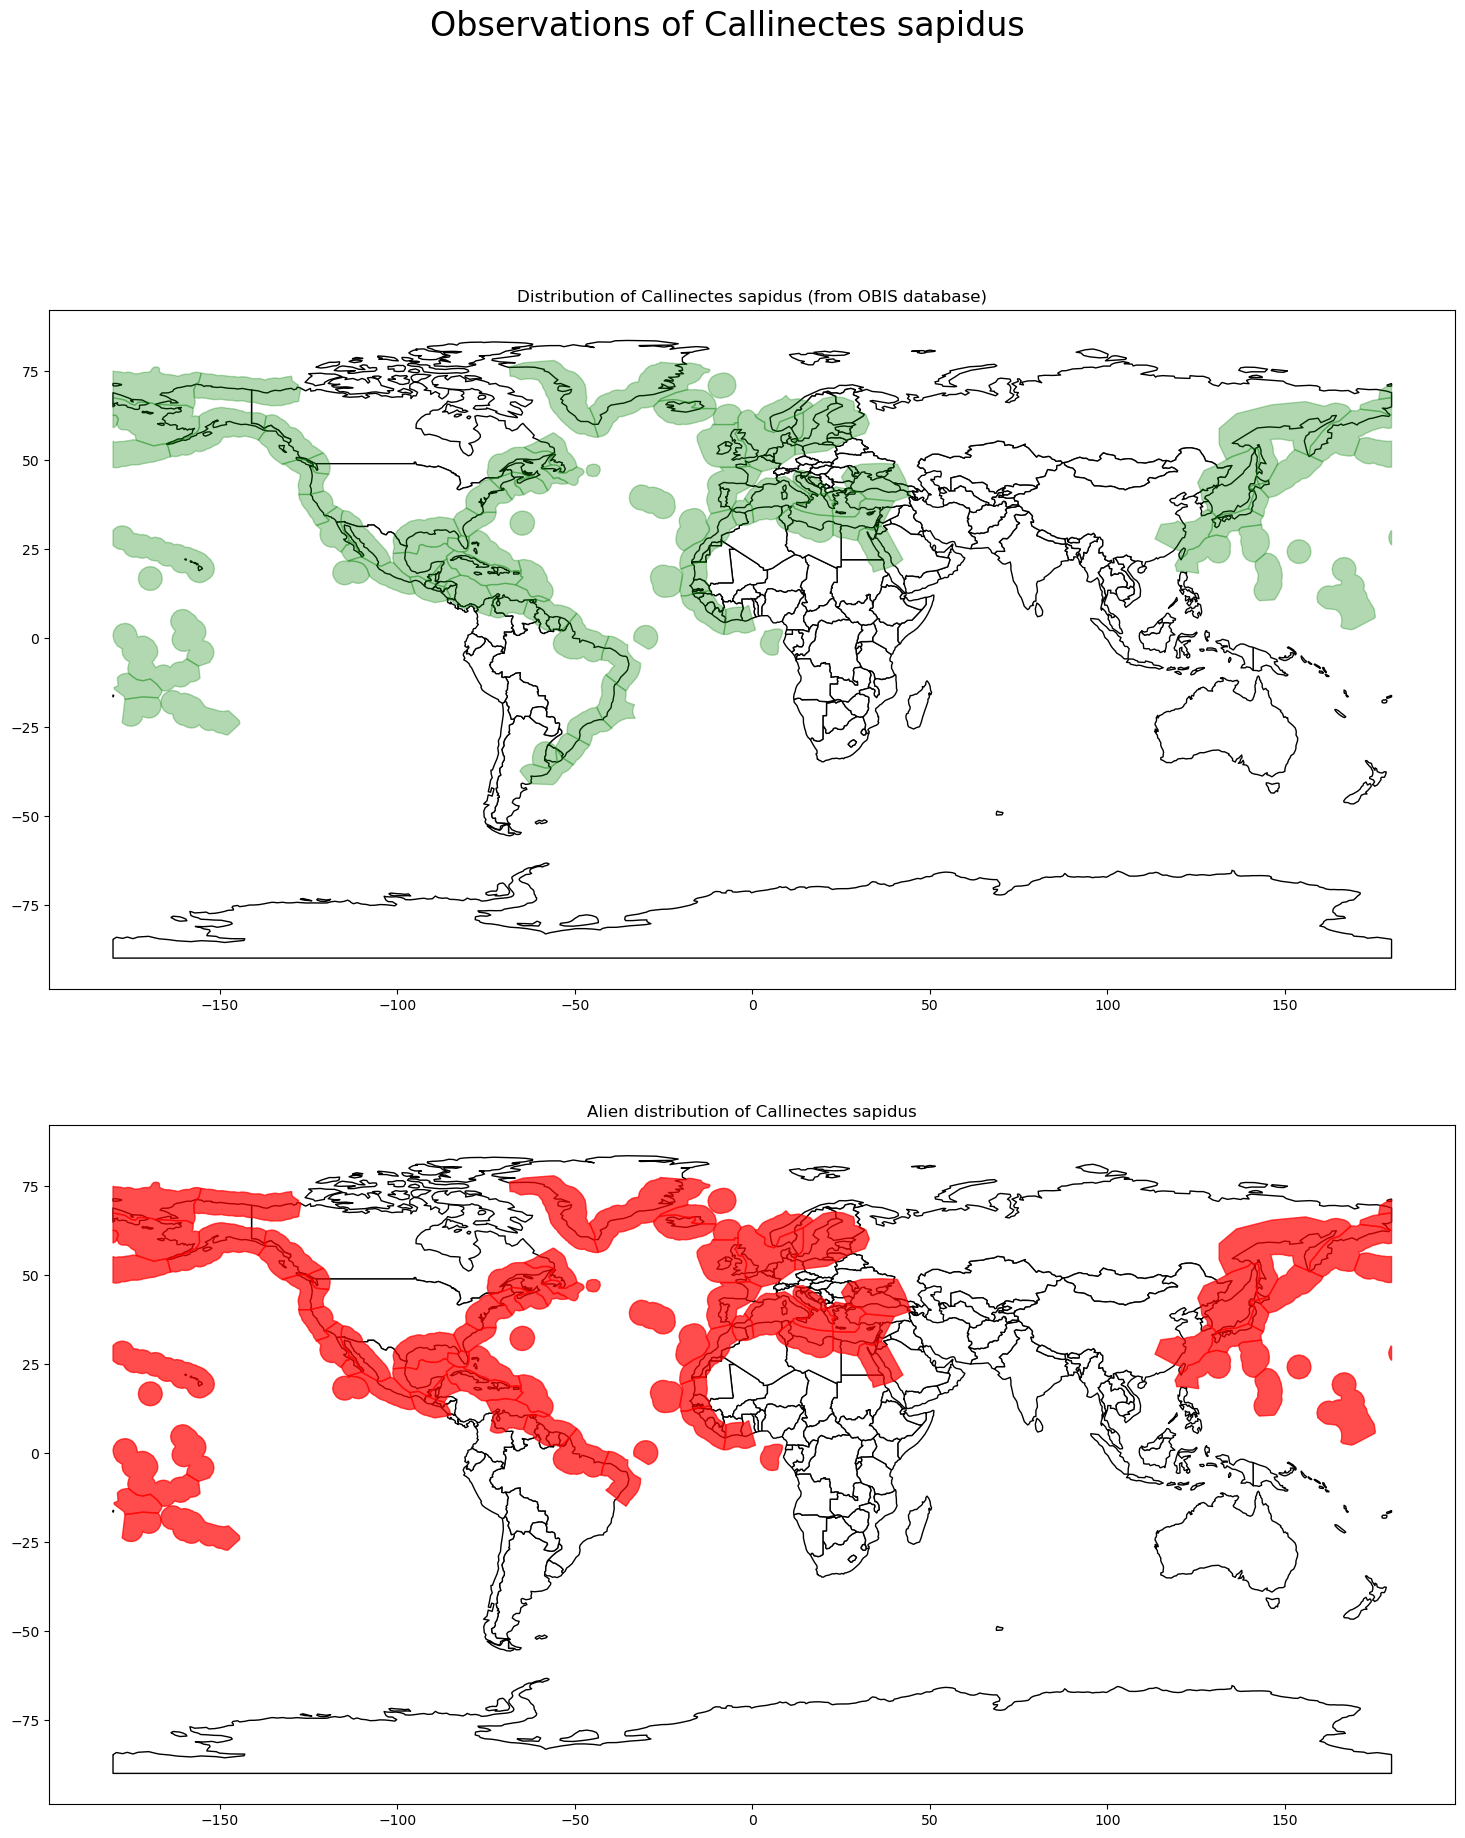

In [7]:
fig=species_data.plot()

## Eco-region assessment

Marinvaders connects data form various databases to gather a list of native 
and alien species present in a given eoc-region. 

Here, we will investigate the species present around the Sulawesi Island. 

To do so, we first need to get the eco-region code of this eco-region. 
The following command lists all eco-regions available in marinvaders

In [8]:
import marinvaders

In [9]:
marinvaders.marine_ecoregions()

ECO_CODE  ECO_CODE_X                    ECOREGION  \
0       20192         192                 Agulhas Bank   
1       20053          53             Aleutian Islands   
2       20072          72                     Amazonia   
3       20194         194            Amsterdam-St Paul   
4       20228         228  Amundsen/Bellingshausen Sea   
..        ...         ...                          ...   
227     25034          34                   Ionian Sea   
228     25031          31                   Aegean Sea   
229     25036          36                  Alboran Sea   
230     25035          35        Western Mediterranean   
231     25010          10      High Arctic Archipelago   

                             PROVINCE                        REALM  \
0                             Agulhas    Temperate Southern Africa   
1    Cold Temperate Northeast Pacific   Temperate Northern Pacific   
2                  North Brazil Shelf            Tropical Atlantic   
3                   Amsterdam-St Paul    Temperate Southern Africa   
4          Continental High Antarctic               Southern Ocean   
..                                ...                          ...   
227                 Mediterranean Sea  Temperate Northern Atlantic   
228                 Mediterranean Sea  Temperate Northern Atlantic   
229                 Mediterranean Sea  Temperate Northern Atlantic   
230                 Mediterranean Sea  Temperate Northern Atlantic   
231                            Arctic                       Arctic   

                                              geometry  
0    POLYGON ((28.35993 -36.64435, 28.28350 -36.676...  
1    MULTIPOLYGON (((-173.39419 55.59807, -168.5559...  
2    POLYGON ((-41.13012 0.47319, -41.03905 0.44390...  
3    POLYGON ((77.52994 -34.52290, 77.92307 -34.545...  
4    POLYGON ((-72.94222 -74.30962, -79.88636 -75.1...  
..                                                 ...  
227  POLYGON ((18.28997 40.28222, 18.46579 40.19296...  
228  POLYGON ((26.80983 41.87778, 29.19196 41.03381...  
229  POLYGON ((0.32179 32.44572, 0.23032 32.38912, ...  
230  POLYGON ((12.48402 37.99237, 11.95092 37.85696...  
231  POLYGON ((-101.62650 75.65949, -101.62650 75.6...  

[232 rows x 6 columns]

When using interacitve [itable](https://github.com/mwouts/itables) you can 
use the search field in the upper right corner to search for a specific 
eco-region. Alternative, we can use core [pandas](https://pandas.pydata.org/) 
functionality to filter the dataframe:

In [10]:
mar_ecoreg = marinvaders.marine_ecoregions()
mar_ecoreg[mar_ecoreg.ECOREGION.str.contains('sulawesi', case=False)]

ECO_CODE  ECO_CODE_X                     ECOREGION  \
123     20133         133            Northeast Sulawesi   
184     20128         128  Sulawesi Sea/Makassar Strait   

                   PROVINCE                 REALM  \
123  Western Coral Triangle  Central Indo-Pacific   
184  Western Coral Triangle  Central Indo-Pacific   

                                              geometry  
123  POLYGON ((122.66982 0.73137, 123.22820 0.66436...  
184  POLYGON ((124.16654 6.48466, 124.58968 6.36849...

With that, we find the eco-region code: 20133

In [11]:
selected_eco_code = 20133

We can now first check where this region is located:

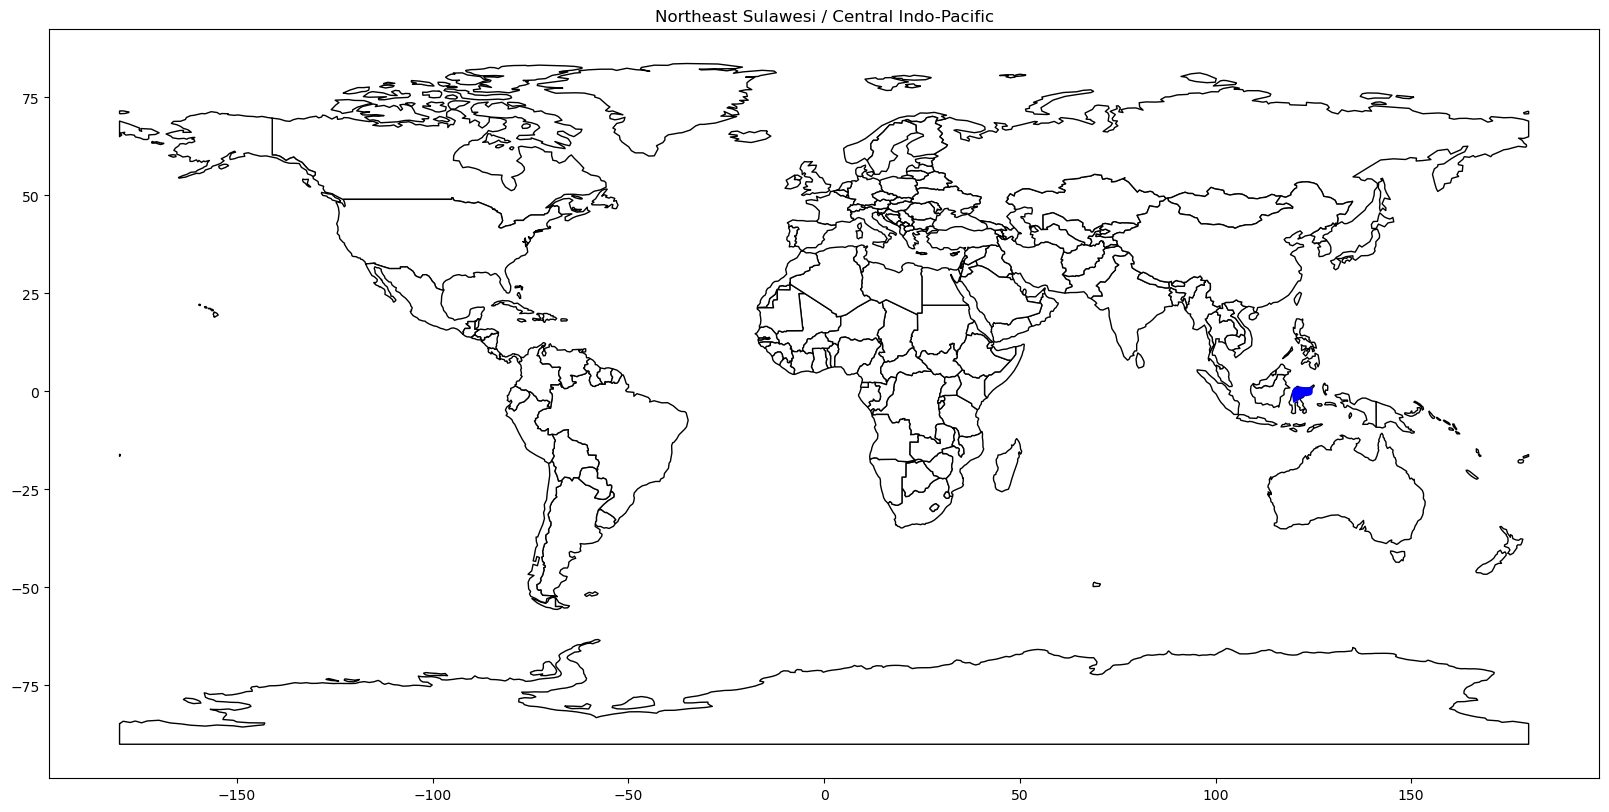

In [12]:
fig = marinvaders.plot(eco_code=selected_eco_code)

Now, we can use marinvaders to get an overview about the marine life in this 
region. **Note** that the following command can take quite some time, as it 
gathers data from remote and local sources for all species present in the selected eco-region.

In [13]:
eco_region_data = marinvaders.MarineLife(eco_code=selected_eco_code)

Lets check the species reported to occur in this region.

In [14]:
eco_region_data.all_species

aphiaID                  species           scientificName  \
0     111656          Amathia distans                      NaN   
1     130969     Sabella spallanzanii                      NaN   
2     141607           Teredo navalis                      NaN   
3     395084          Varanus indicus                      NaN   
4     395098           Carijoa riisei                      NaN   
..       ...                      ...                      ...   
311   211101          Vasum ceramicum          Vasum ceramicum   
312   393723  Mimachlamys albolineata  Mimachlamys albolineata   
313   381526     Microfragum festivum     Microfragum festivum   
314   215569              Conus virgo              Conus virgo   
315   724806        Quadrans spinosus        Quadrans spinosus   

           acceptedNameUsage  ECO_CODE  
0                        NaN     20133  
1                        NaN     20133  
2                        NaN     20133  
3                        NaN     20133  
4                        NaN     20133  
..                       ...       ...  
311          Vasum ceramicum     20133  
312  Mimachlamys albolineata     20133  
313     Microfragum festivum     20133  
314              Conus virgo     20133  
315        Quadrans spinosus     20133  

[316 rows x 5 columns]

We can then also extract all species reported as alien in this region:

In [15]:
eco_region_data.alien_species

aphiaID               species scientificName acceptedNameUsage  \
0   111656       Amathia distans            NaN               NaN   
1   130969  Sabella spallanzanii            NaN               NaN   
2   141607        Teredo navalis            NaN               NaN   
3   395084       Varanus indicus            NaN               NaN   
4   395098        Carijoa riisei            NaN               NaN   

            ECOREGION  ECO_CODE establishmentMeans       dataset  \
0  Northeast Sulawesi     20133              Alien        NatCon   
1  Northeast Sulawesi     20133              Alien        NatCon   
2  Northeast Sulawesi     20133              Alien        NatCon   
3  Northeast Sulawesi     20133              Alien  WoRMS,NatCon   
4  Northeast Sulawesi     20133              Alien  WoRMS,NatCon   

                                            geometry  
0  POLYGON ((122.66982122736022 0.731369475015810...  
1  POLYGON ((122.66982122736022 0.731369475015810...  
2  POLYGON ((122.66982122736022 0.731369475015810...  
3  POLYGON ((122.66982122736022 0.731369475015810...  
4  POLYGON ((122.66982122736022 0.731369475015810...

In [16]:
print(f"Found {len(eco_region_data.alien_species)} alien species in that region: {', '.join(eco_region_data.alien_species.species)}")

Found 5 alien species in that region: Amathia distans, Sabella spallanzanii, Teredo navalis, Varanus indicus, Carijoa riisei


## Conclusion and additional data

With Marinvaders it is possible to assess the alien status of certain species and to assess alien species within an eco-region. Marinvaders also integrates with data from IUCN: [GISD](https://www.iucngisd.org/gisd/) and [Red list](https://www.iucnredlist.org/) which provides additional information on the distribution of aliens species (GISD) and which native species are affeced by alien invaders (redlist).
Due to licencing issues these data can not be included automatically but needs to be downloaded manually. See the section [Optional IUCN data](https://marinvaders.gitlab.io/marinvaders/iucn_data/) for further details.

## About

Marinvaders was developed and maintained by the [Industrial Ecology Digital 
Lab](https://iedl.no "IEDL") and LC-Impact group led by [Francesca
Verones](https://www.ntnu.edu/employees/francesca.verones), both at the [Industrial Ecology Programme](https://www.ntnu.edu/indecol/industrial-ecology-programme) at [NTNU](https://www.ntnu.edu/).  

Marinvaders is part of the [ATLANTIS ERC project.](https://atlantis-erc.eu/)

